In [67]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
import pandas as pd
import numpy as np

In [69]:
oil_data: pd.DataFrame = pd.read_csv('data/raw/GTA_Oil.csv')
iron_data: pd.DataFrame = pd.read_csv('data/raw/GTA_Iron_and_Steel.csv')

In [70]:
target_columns: list = [
    "year", 
    "month", 
    "import_country", 
    "export_country", 
    "commodity", 
    "value", 
    "quantity",
]

In [71]:
print(oil_data.columns)
print(iron_data.columns)

Index(['YEAR', 'MONTH', 'Importing Country', 'COMMODITY', 'UNIT',
       'Exporting Country', 'VALUE', 'QUANTITY', 'Unnamed: 8'],
      dtype='object')
Index(['Export_counrty', 'Import_country', 'Month', 'Year',
       'Nominal Value (SUM)', 'Tons (SUM)'],
      dtype='object')


In [72]:
oil_placeholder_columns: list = [
    "year",
    "month",
    "import_country",
    "commodity",
    "unit",
    "export_country",
    "value",
    "quantity",
    "none",
]

oil_data.columns = oil_placeholder_columns
oil_data.drop(columns=["none", "unit"], inplace=True)
oil_data = oil_data[target_columns]
oil_data["commodity"] = "oil"
oil_data.head()

,year,month,import_country,export_country,commodity,value,quantity
0,2015,1,United States,Albania,oil,21207242,481201
1,2015,1,Norway,Angola,oil,19124088,339673
2,2015,1,United States,Angola,oil,53244936,855664
3,2015,1,United States,Angola,oil,107596271,1501330
4,2015,1,United States,Argentina,oil,50166967,933710


In [73]:
iron_placeholder_columns: list = [
    "export_country",
    "import_country",
    "month",
    "year",
    "value",
    "quantity",
]

iron_data.columns = iron_placeholder_columns
iron_data["commodity"] = "steel_&_iron"
iron_data = iron_data[target_columns]
iron_data.head()


,year,month,import_country,export_country,commodity,value,quantity
0,2013,1,El Salvador,China (mainland),steel_&_iron,802087.572200,968.562732
1,2013,1,Senegal,Afghanistan,steel_&_iron,30812.240230,44.113000
2,2013,1,Macedonia,Romania,steel_&_iron,40498.707030,59.779999
3,2013,1,Tanzania,South Africa,steel_&_iron,116129.598000,112.279427
4,2013,1,Sri Lanka,Italy,steel_&_iron,1400.911255,0.004000


In [74]:
from utils import (
    load_commodities_dataframes, 
    plot_commodities_atemporal_ppu_distribution,
    plot_commodities_temporal_ppu_distribution,
    plot_commodity_geotemporal_export_gradients,
    plot_commodity_geotemporal_import_gradients,
)

from transforms import (
    Composite,
    AppendUnitaryPrice,
    GeographicFilter,
    GeographicEnhancer,
    UnitGaussianNormalizer,
    NatLogScaler,
)

In [76]:
input_encoder = Composite(
    [
        AppendUnitaryPrice(),
        GeographicFilter(),
        GeographicEnhancer(),
        UnitGaussianNormalizer(dims=["unit_price"], save_checkpoint=True),
    ]
)
output_encoder = None
verbose = False

oil_data, oil_data_processor = load_commodities_dataframes(
    data_frame=oil_data,
    input_encoder=input_encoder,
    output_encoder=output_encoder,
    verbose=verbose,
)

iron_data, iron_data_processor = load_commodities_dataframes(
    data_frame=iron_data,
    input_encoder=input_encoder,
    output_encoder=output_encoder,
    verbose=verbose,
)

[autoreload of numpy failed: Traceback (most recent call last):
  File "/Users/numi/Library/Python/3.11/lib/python/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/numi/Library/Python/3.11/lib/python/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/opt/homebrew/Cellar/python@3.11/3.11.7_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/opt/homebrew/lib/python3.11/site-packages/numpy/__init__.py", line 393, in <module>
    _mac_os_check()
  File "/opt/homebrew/lib/python3.11/site-packages/numpy/__init__.py", line 386,

TypeError: int() argument must be a string, a bytes-like object or a real number, not '_NoValueType'

In [ ]:
print(oil_data[oil_data["unit_price"]>3])
print(iron_data[iron_data["unit_price"]>3])

      year  month export_country export_country_code export_country_region  \
62    2015      2  United States                 USA              Americas   
499   2016      6        Belgium                 BEL                Europe   
828   2017      4    Netherlands                 NLD                Europe   
929   2017      7  United States                 USA              Americas   
1029  2017     10      Singapore                 SGP                  Asia   

     export_country_subregion export_country_latitude  \
62           Northern America             45.73643438   
499            Western Europe             50.64206011   
828            Western Europe             52.26998137   
929          Northern America             45.73643438   
1029       South-eastern Asia             1.344965221   

     export_country_longitude import_country import_country_code  \
62                -112.404207         Mexico                 MEX   
499               4.658786236  United States        

In [ ]:
commodities: list = ["oil", "steel_&_iron"]

for commodity in commodities:
    plot_commodities_atemporal_ppu_distribution(commodity=commodity)


/opt/homebrew/lib/python3.11/site-packages/PIL/Image.py:125: RuntimeWarning: The _imaging extension was built for another version of Pillow or PIL:
Core version: 10.2.0
Pillow version: 9.5.0
  warnings.warn(str(v), RuntimeWarning)
[autoreload of PIL.Image failed: Traceback (most recent call last):
  File "/Users/numi/Library/Python/3.11/lib/python/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/numi/Library/Python/3.11/lib/python/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/opt/homebrew/Cellar/python@3.11/3.11.7_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>

AttributeError: module 'PIL' has no attribute 'Image'

<Figure size 1000x600 with 1 Axes>

AttributeError: module 'PIL' has no attribute 'Image'

<Figure size 1000x600 with 1 Axes>

/Users/numi/Documents/data-driven-modelling/utils.py:77: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  # Group by year and month and calculate the mean unit price


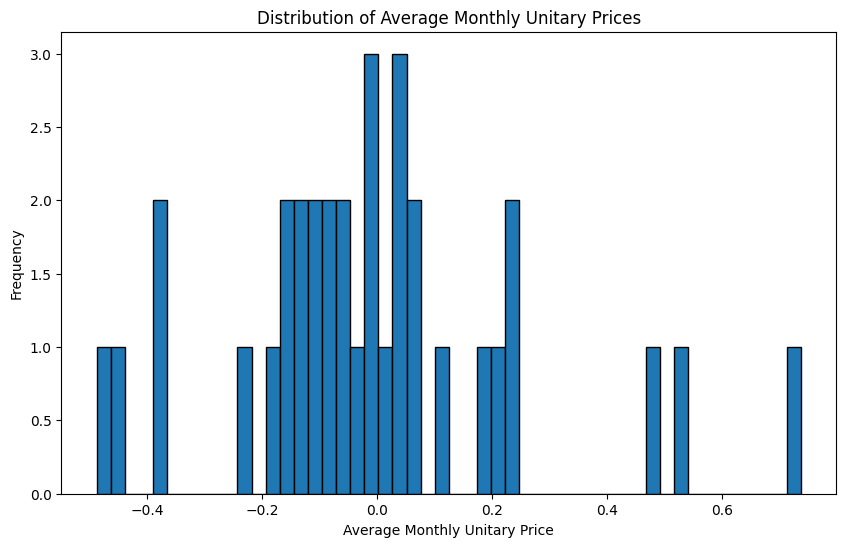

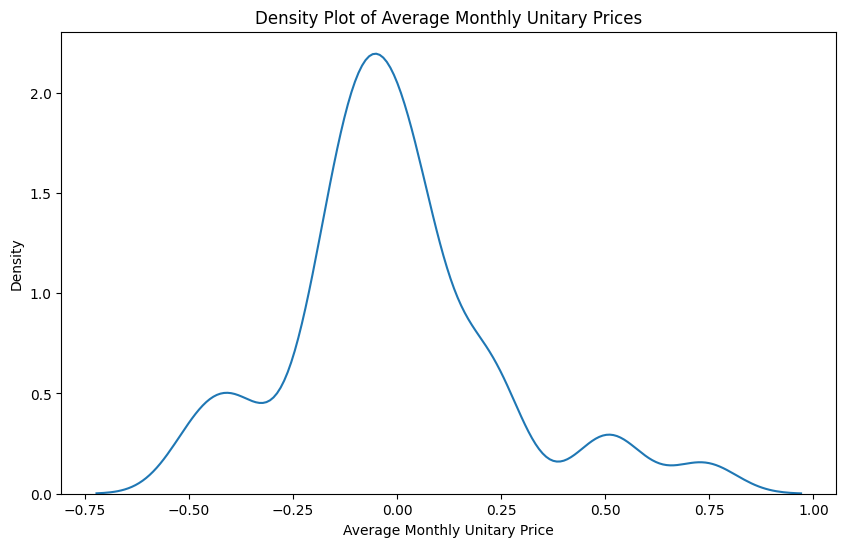

/Users/numi/Documents/data-driven-modelling/utils.py:77: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  # Group by year and month and calculate the mean unit price


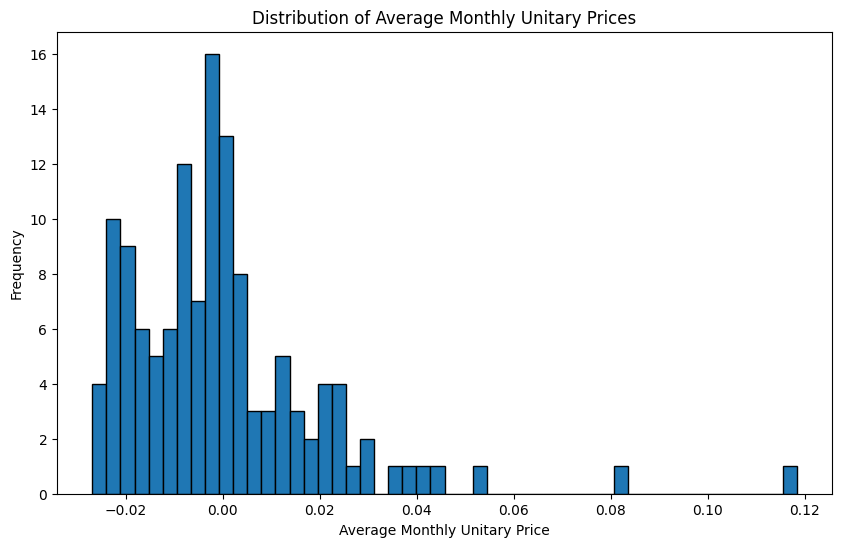

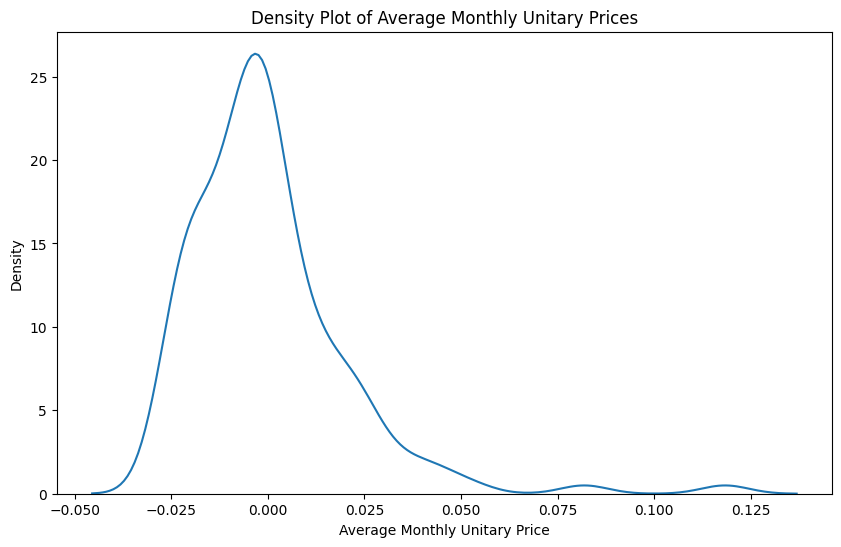

In [ ]:
commodities: list = ["oil", "steel_&_iron"]

for commodity in commodities:
    plot_commodities_temporal_ppu_distribution(commodity=commodity)

/Users/numi/Documents/data-driven-modelling/utils.py:112: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
/Users/numi/Documents/data-driven-modelling/utils.py:123: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.


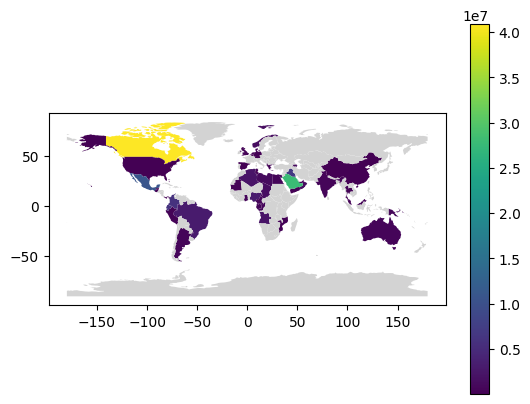

/Users/numi/Documents/data-driven-modelling/utils.py:112: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
/Users/numi/Documents/data-driven-modelling/utils.py:123: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.


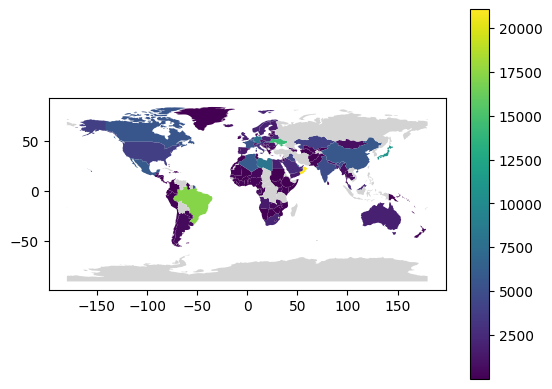

In [ ]:
commodities: list = ["oil", "steel_&_iron"]

for commodity in commodities:
    plot_commodity_geotemporal_export_gradients(commodity=commodity)

/Users/numi/Documents/data-driven-modelling/utils.py:148: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
/Users/numi/Documents/data-driven-modelling/utils.py:159: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.


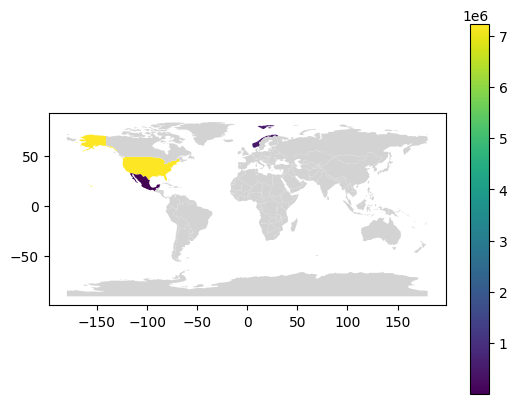

/Users/numi/Documents/data-driven-modelling/utils.py:148: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
/Users/numi/Documents/data-driven-modelling/utils.py:159: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.


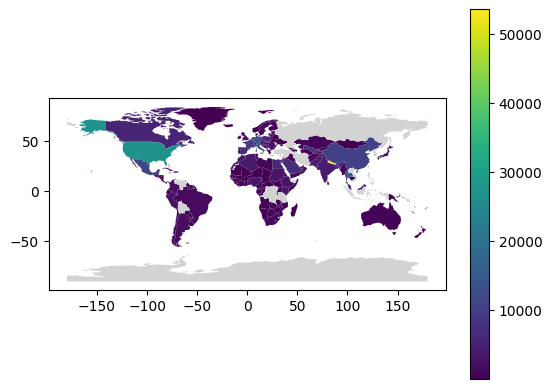

In [ ]:
commodities: list = ["oil", "steel_&_iron"]

for commodity in commodities:
    plot_commodity_geotemporal_import_gradients(commodity=commodity)